# Support Vector Machine For Handwritten Digits Classification

## Step 1: Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns


## Step 2: Load Dataset

In [4]:
# Load data
digits = load_digits()
X, y = digits.data, digits.target

In [5]:
print("Shape of X:", X.shape)   # (1797, 64)
print("Unique labels:", set(y))

Shape of X: (1797, 64)
Unique labels: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)}


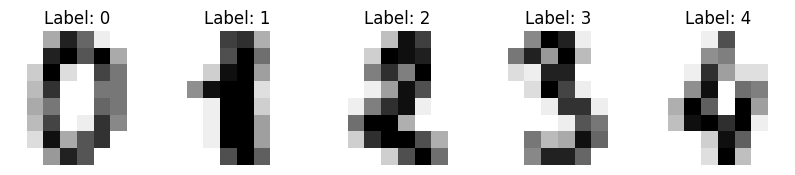

In [6]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, y):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")
    ax.axis("off")
plt.show()

## Step 2: Train-test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## Step 3: Scale features

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 4: Train SVM

In [9]:
clf = SVC(kernel="rbf", gamma=0.001, C=10, random_state=42)
clf.fit(X_train, y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Step 5: Evaluate

### Evaluation on training data

Accuracy: 0.9936356404136834

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       0.98      1.00      0.99       127
           2       0.99      1.00      1.00       124
           3       0.99      0.99      0.99       128
           4       1.00      0.98      0.99       127
           5       0.99      1.00      1.00       127
           6       1.00      1.00      1.00       127
           7       1.00      0.99      1.00       125
           8       0.98      0.98      0.98       122
           9       0.99      0.98      0.99       126

    accuracy                           0.99      1257
   macro avg       0.99      0.99      0.99      1257
weighted avg       0.99      0.99      0.99      1257



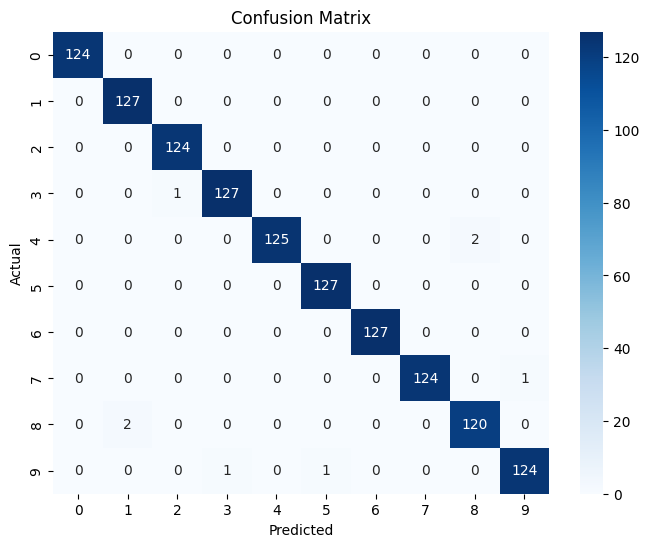

In [13]:
y_pred_train = clf.predict(X_train)

print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nClassification Report:\n", classification_report(y_train, y_pred_train))

# Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Evaluation on testing data

Accuracy: 0.9851851851851852

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.93      0.98      0.96        55
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        55
           4       0.98      0.98      0.98        54
           5       1.00      0.98      0.99        55
           6       1.00      1.00      1.00        54
           7       0.98      1.00      0.99        54
           8       0.98      0.92      0.95        52
           9       0.98      0.98      0.98        54

    accuracy                           0.99       540
   macro avg       0.99      0.98      0.99       540
weighted avg       0.99      0.99      0.99       540



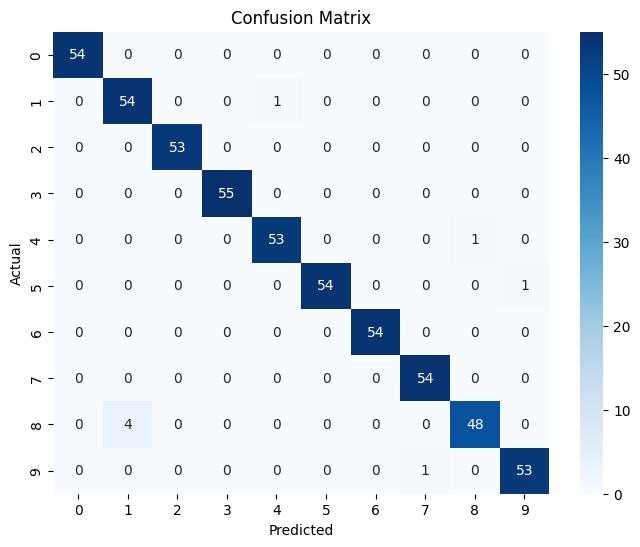

In [10]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Step 6: Predicting one digit

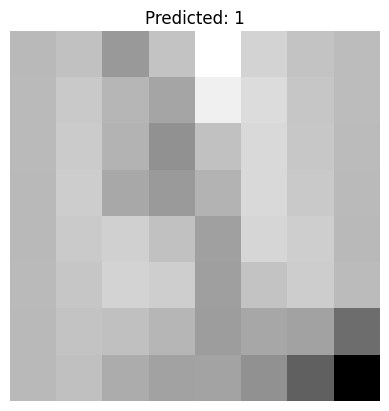

In [11]:
sample = X_test[0].reshape(1, -1)
prediction = clf.predict(sample)
plt.imshow(X_test[0].reshape(8,8), cmap=plt.cm.gray_r, interpolation="nearest")
plt.title(f"Predicted: {prediction[0]}")
plt.axis("off")
plt.show()